In [2]:
!pip install tensorflow pandas scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 857.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.2 MB/s eta 0:00:00


Using device: /CPU:0
Training starts...
E[100/4000], L1:5.711e+04, L2:3.007e+03, Tot:6.011e+04, LR:5.00e-04
E[200/4000], L1:1.544e+04, L2:4.357e+02, Tot:1.588e+04, LR:5.00e-04
E[300/4000], L1:9.339e+03, L2:1.694e+02, Tot:9.509e+03, LR:5.00e-04
E[400/4000], L1:4.516e+03, L2:1.412e+02, Tot:4.657e+03, LR:5.00e-04
E[500/4000], L1:1.687e+03, L2:2.820e+02, Tot:1.969e+03, LR:5.00e-04
E[600/4000], L1:1.309e+03, L2:3.570e+02, Tot:1.666e+03, LR:5.00e-04
E[700/4000], L1:1.064e+03, L2:3.931e+02, Tot:1.457e+03, LR:5.00e-04
E[800/4000], L1:8.608e+02, L2:4.267e+02, Tot:1.288e+03, LR:5.00e-04
E[900/4000], L1:6.999e+02, L2:4.626e+02, Tot:1.163e+03, LR:5.00e-04
E[1000/4000], L1:5.883e+02, L2:4.935e+02, Tot:1.082e+03, LR:4.80e-04
E[1100/4000], L1:5.133e+02, L2:5.123e+02, Tot:1.026e+03, LR:4.80e-04
E[1200/4000], L1:4.542e+02, L2:5.272e+02, Tot:9.814e+02, LR:4.80e-04
E[1300/4000], L1:3.979e+02, L2:5.457e+02, Tot:9.436e+02, LR:4.80e-04
E[1400/4000], L1:3.614e+02, L2:5.578e+02, Tot:9.191e+02, LR:4.80e-04
E[1

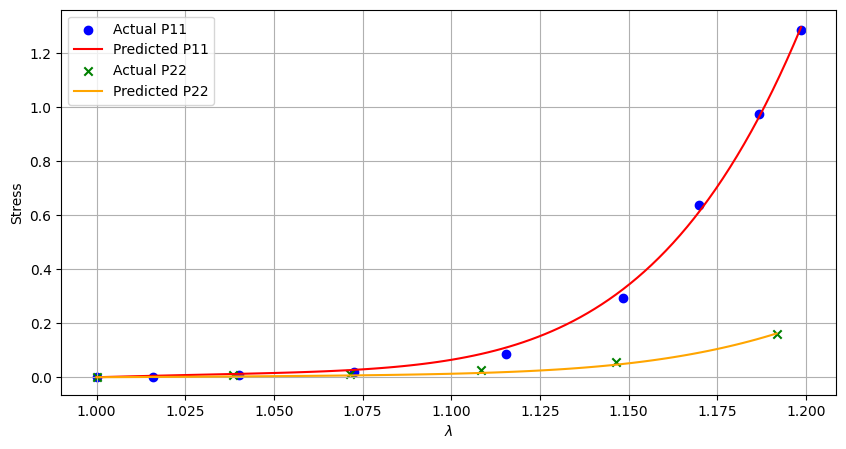


Calculating contributions for uniaxial...
  - Calculated contribution for term: Pow(I1)
  - Calculated contribution for term: Pow(I2)
  - Calculated contribution for term: Cosh(I1)


  - Calculated contribution for term: Cosh(I2)


  - Calculated contribution for term: Sinh(I1)
  - Calculated contribution for term: Sinh(I2)
  - Calculated contribution for term: Cosh(I4)
  - Calculated contribution for term: Cosh(I6)
  - Calculated contribution for term: Sinh(I4)
  - Calculated contribution for term: Sinh(I6)

Calculating contributions for biaxial...
  - Calculated contribution for term: Pow(I1)
  - Calculated contribution for term: Pow(I2)
  - Calculated contribution for term: Cosh(I1)


  - Calculated contribution for term: Cosh(I2)


  - Calculated contribution for term: Sinh(I1)
  - Calculated contribution for term: Sinh(I2)
  - Calculated contribution for term: Cosh(I4)
  - Calculated contribution for term: Cosh(I6)
  - Calculated contribution for term: Sinh(I4)
  - Calculated contribution for term: Sinh(I6)

Successfully saved stress contributions to 'P_contributions_sinh_cosh_power.csv'


In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
from scipy.io import savemat

tf.keras.backend.set_floatx('float64')
DEVICE = "/GPU:0" if tf.config.list_physical_devices('GPU') else "/CPU:0"
print(f"Using device: {DEVICE}")

ARG_CLIP_MIN = tf.constant(-10.0, dtype=tf.float64)
ARG_CLIP_MAX = tf.constant(10.0, dtype=tf.float64)

class StrainEnergyANN_Layered_TF(tf.keras.Model):
    # ... (Your entire class definition remains exactly the same here) ...
    def __init__(self):
        super().__init__(name="StrainEnergyModel")
        # Power Law terms (I1, I2)
        self.raw_log_k1=self.add_weight(name="raw_log_k1",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k2=self.add_weight(name="raw_log_k2",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_i1=self.add_weight(name="raw_log_i1",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_i2=self.add_weight(name="raw_log_i2",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_a1=self.add_weight(name="raw_log_a1",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_a2=self.add_weight(name="raw_log_a2",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)

        # Cosh with i terms (I1, I2)
        self.raw_log_k5=self.add_weight(name="raw_log_k5",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k6=self.add_weight(name="raw_log_k6",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_i5=self.add_weight(name="raw_log_i5",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_i6=self.add_weight(name="raw_log_i6",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_a5=self.add_weight(name="raw_log_a5",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_a6=self.add_weight(name="raw_log_a6",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_a5_prime=self.add_weight(name="raw_log_a5_prime",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.2)),trainable=True)
        self.raw_log_a6_prime=self.add_weight(name="raw_log_a6_prime",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.2)),trainable=True)

        # Sinh with i terms (I1, I2)
        self.raw_log_k7=self.add_weight(name="raw_log_k7",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k8=self.add_weight(name="raw_log_k8",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_i7=self.add_weight(name="raw_log_i7",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_i8=self.add_weight(name="raw_log_i8",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_a7=self.add_weight(name="raw_log_a7",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_a8=self.add_weight(name="raw_log_a8",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_a7_prime=self.add_weight(name="raw_log_a7_prime",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.2)),trainable=True)
        self.raw_log_a8_prime=self.add_weight(name="raw_log_a8_prime",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.2)),trainable=True)

        # Cosh terms (I4, I6)
        self.raw_log_k13=self.add_weight(name="raw_log_k13",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k14=self.add_weight(name="raw_log_k14",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_b5=self.add_weight(name="raw_log_b5",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_b6=self.add_weight(name="raw_log_b6",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_b5_prime=self.add_weight(name="raw_log_b5_prime",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.2)),trainable=True)
        self.raw_log_b6_prime=self.add_weight(name="raw_log_b6_prime",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.2)),trainable=True)

        # Sinh terms (I4, I6)
        self.raw_log_k15=self.add_weight(name="raw_log_k15",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_k16=self.add_weight(name="raw_log_k16",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),trainable=True)
        self.raw_log_b7=self.add_weight(name="raw_log_b7",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_b8=self.add_weight(name="raw_log_b8",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.1)),trainable=True)
        self.raw_log_b7_prime=self.add_weight(name="raw_log_b7_prime",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.2)),trainable=True)
        self.raw_log_b8_prime=self.add_weight(name="raw_log_b8_prime",shape=(),dtype=tf.float64,initializer=tf.keras.initializers.Constant(tf.math.log(0.2)),trainable=True)

        self.three=tf.constant(3.0,dtype=tf.float64); self.one=tf.constant(1.0,dtype=tf.float64); self.pow_base_epsilon=tf.constant(1e-8,dtype=tf.float64)

    def _term_power_law(self, I, k, i, c, ref_val): return c * tf.pow(tf.maximum(tf.pow(I, k) - tf.pow(ref_val, k), 0.0) + self.pow_base_epsilon, i)
    def _term_cosh_minus_one_with_i(self, I, k, i, ic, oc, ref_val): return oc * (tf.cosh(tf.clip_by_value(ic * tf.pow(tf.maximum(tf.pow(I, k) - tf.pow(ref_val, k), 0.0) + self.pow_base_epsilon, i), ARG_CLIP_MIN, ARG_CLIP_MAX)) - 1.0)
    def _term_sinh_with_i(self, I, k, i, ic, oc, ref_val): return oc * tf.sinh(tf.clip_by_value(ic * tf.pow(tf.maximum(tf.pow(I, k) - tf.pow(ref_val, k), 0.0) + self.pow_base_epsilon, i), ARG_CLIP_MIN, ARG_CLIP_MAX))
    def _term_cosh_minus_one(self, I, k, ic, oc, ref_val): return oc * (tf.cosh(tf.clip_by_value(ic * (tf.pow(I, k) - tf.pow(ref_val, k)), ARG_CLIP_MIN, ARG_CLIP_MAX)) - 1.0)
    def _term_sinh(self, I, k, ic, oc, ref_val): return oc * tf.sinh(tf.clip_by_value(ic * (tf.pow(I, k) - tf.pow(ref_val, k)), ARG_CLIP_MIN, ARG_CLIP_MAX))

    def call(self, I1, I2, I4, I6):
        k1=1.0+tf.exp(self.raw_log_k1);k2=1.5+tf.exp(self.raw_log_k2);k5=1.0+tf.exp(self.raw_log_k5);k6=1.5+tf.exp(self.raw_log_k6);k7=1.0+tf.exp(self.raw_log_k7);k8=1.5+tf.exp(self.raw_log_k8);k13=1.0+tf.exp(self.raw_log_k13);k14=1.5+tf.exp(self.raw_log_k14);k15=1.0+tf.exp(self.raw_log_k15);k16=1.5+tf.exp(self.raw_log_k16)
        i1=1.0+tf.exp(self.raw_log_i1);i2=1.0+tf.exp(self.raw_log_i2);i5=1.0+tf.exp(self.raw_log_i5);i6=1.0+tf.exp(self.raw_log_i6);i7=1.0+tf.exp(self.raw_log_i7);i8=1.0+tf.exp(self.raw_log_i8)
        a1=tf.exp(self.raw_log_a1);a2=tf.exp(self.raw_log_a2);a5=tf.exp(self.raw_log_a5);a6=tf.exp(self.raw_log_a6);a7=tf.exp(self.raw_log_a7);a8=tf.exp(self.raw_log_a8)
        a5_prime=tf.exp(self.raw_log_a5_prime);a6_prime=tf.exp(self.raw_log_a6_prime);a7_prime=tf.exp(self.raw_log_a7_prime);a8_prime=tf.exp(self.raw_log_a8_prime)
        b5=tf.exp(self.raw_log_b5);b6=tf.exp(self.raw_log_b6);b7=tf.exp(self.raw_log_b7);b8=tf.exp(self.raw_log_b8)
        b5_prime=tf.exp(self.raw_log_b5_prime);b6_prime=tf.exp(self.raw_log_b6_prime);b7_prime=tf.exp(self.raw_log_b7_prime);b8_prime=tf.exp(self.raw_log_b8_prime)

        W = tf.zeros_like(I1,dtype=tf.float64)
        W += self._term_power_law(I1,k1,i1,a1,self.three); W += self._term_power_law(I2,k2,i2,a2,self.three)
        W += self._term_cosh_minus_one_with_i(I1,k5,i5,a5_prime,a5,self.three); W += self._term_cosh_minus_one_with_i(I2,k6,i6,a6_prime,a6,self.three)
        W += self._term_sinh_with_i(I1,k7,i7,a7_prime,a7,self.three); W += self._term_sinh_with_i(I2,k8,i8,a8_prime,a8,self.three)
        W += self._term_cosh_minus_one(I4,k13,b5_prime,b5,self.one); W += self._term_cosh_minus_one(I6,k14,b6_prime,b6,self.one)
        W += self._term_sinh(I4,k15,b7_prime,b7,self.one); W += self._term_sinh(I6,k16,b8_prime,b8,self.one)
        return W

# ... (All the original stress calculation functions remain the same) ...
# ... (get_invariants_tf, get_W_and_gradients_tf, calculate_P11_task1_tf, etc.) ...
@tf.function
def get_invariants_tf(lambda1,lambda2,lambda3):
    min_lambda_val=tf.constant(1e-4,dtype=tf.float64); lambda1=tf.maximum(lambda1,min_lambda_val); lambda2=tf.maximum(lambda2,min_lambda_val); lambda3=tf.maximum(lambda3,min_lambda_val); l1s=tf.pow(lambda1,2.0); l2s=tf.pow(lambda2,2.0); l3s=tf.pow(lambda3,2.0)
    I1=l1s+l2s+l3s; I2=tf.pow(lambda1*lambda2,2.0)+tf.pow(lambda2*lambda3,2.0)+tf.pow(lambda3*lambda1,2.0); I4=l1s; I6=tf.pow(lambda1,-2.0)
    return I1,I2,I4,I6
@tf.function
def get_W_and_gradients_tf(l1t,l2t,l3t,model, W_func):
    with tf.GradientTape(watch_accessed_variables=False) as tape:
        tape.watch([l1t, l2t, l3t]); I1, I2, I4, I6 = get_invariants_tf(l1t, l2t, l3t); W_val = W_func(I1, I2, I4, I6)
    grads = tape.gradient(W_val, [l1t, l2t, l3t]); dWdl1 = grads[0] if grads[0] is not None else tf.zeros_like(l1t); dWdl2 = grads[1] if grads[1] is not None else tf.zeros_like(l2t); dWdl3 = grads[2] if grads[2] is not None else tf.zeros_like(l3t)
    return W_val, dWdl1, dWdl2, dWdl3
@tf.function
def _calculate_raw_P11_task1_tf(l1vst, model, W_func):
    l1t = tf.maximum(l1vst, tf.constant(1e-4, dtype=tf.float64))
    l2t = tf.pow(l1t, -0.5)
    l3t = tf.pow(l1t, -0.5)
    _, dWdl1, _, dWdl3 = get_W_and_gradients_tf(l1t, l2t, l3t, model, W_func)
    Ph = l3t * dWdl3
    safe_l1t = tf.maximum(l1t, tf.constant(1e-6, dtype=tf.float64))
    return (dWdl1 - Ph / safe_l1t) / 7.5
@tf.function
def calculate_P11_task1_tf(l1vst, model, W_func):
    p11_raw = _calculate_raw_P11_task1_tf(l1vst, model, W_func)
    p11_offset = _calculate_raw_P11_task1_tf(tf.constant([1.0], dtype=tf.float64), model, W_func)
    return p11_raw - p11_offset

@tf.function
def sigma11_for_root_tf(lambda1_trial_t, lambda2_fixed_t_tensor, model, W_func):
    lambda1_trial_t_stable = tf.maximum(lambda1_trial_t, tf.constant(1e-4, dtype=tf.float64)); lambda2_fixed_t_stable = tf.maximum(lambda2_fixed_t_tensor, tf.constant(1e-4, dtype=tf.float64))
    safe_denom_prod = tf.maximum(lambda1_trial_t_stable * lambda2_fixed_t_stable, tf.constant(1e-6, dtype=tf.float64)); lambda3_trial_t = (1.0 / safe_denom_prod)
    _, dW_dlambda1, _, dW_dlambda3 = get_W_and_gradients_tf(lambda1_trial_t_stable, lambda2_fixed_t_stable, lambda3_trial_t, model, W_func); P_hydro = lambda3_trial_t * dW_dlambda3
    safe_lambda1_trial_t_stable = tf.maximum(lambda1_trial_t_stable, tf.constant(1e-6, dtype=tf.float64)); return (dW_dlambda1 - P_hydro / safe_lambda1_trial_t_stable)

@tf.function
def find_lambda1_newton_tf(lambda2_val_scalar_tensor, model, W_func, initial_lambda1_guess=1.0, iterations=tf.constant(10, dtype=tf.int32), tol=1e-7):
    min_lambda_val_newton=tf.constant(0.2,dtype=tf.float64); max_lambda_val_newton=tf.constant(3.0,dtype=tf.float64); max_step_lambda=tf.constant(0.1,dtype=tf.float64)
    loop_vars = [tf.constant(0, dtype=tf.int32), initial_lambda1_guess, tf.constant(False, dtype=tf.bool)]
    def cond(i, _, converged): return tf.logical_and(i < iterations, tf.logical_not(converged))
    def body(i, current_lambda, _):
        with tf.GradientTape(watch_accessed_variables=False) as tape:
            tape.watch(current_lambda); sigma11 = sigma11_for_root_tf(current_lambda, lambda2_val_scalar_tensor, model, W_func)
        grad = tape.gradient(sigma11, current_lambda); newly_converged = tf.abs(sigma11) < tol
        problem = grad is None or tf.math.is_nan(grad) or tf.math.is_inf(grad)
        def update_lambda():
            delta = sigma11 / (grad + tf.constant(1e-8, dtype=tf.float64) * tf.sign(grad)); problem_delta = tf.math.is_nan(delta) or tf.math.is_inf(delta)
            safe_delta = tf.cond(problem_delta, lambda: tf.constant(0.0, dtype=tf.float64), lambda: delta); clipped_delta = tf.clip_by_value(safe_delta, -max_step_lambda, max_step_lambda)
            return tf.clip_by_value(current_lambda - clipped_delta, min_lambda_val_newton, max_lambda_val_newton)
        next_lambda = tf.cond(problem, lambda: current_lambda, update_lambda); return [i + 1, next_lambda, tf.logical_or(newly_converged, problem)]
    _, final_lambda, _ = tf.while_loop(cond, body, loop_vars); return final_lambda

@tf.function
def _calculate_raw_P22_task2_tf(lambda2_val_scalar_tensor, model, W_func):
    lambda2_stable = tf.maximum(lambda2_val_scalar_tensor, tf.constant(1e-4, dtype=tf.float64))
    initial_lambda1_guess = 1.0 / tf.sqrt(lambda2_stable)
    lambda1_root_t = find_lambda1_newton_tf(lambda2_stable, model, W_func, initial_lambda1_guess)
    lambda1_root_t_stable = tf.maximum(lambda1_root_t, tf.constant(1e-4, dtype=tf.float64))
    safe_denom = tf.maximum(lambda1_root_t_stable * lambda2_stable, tf.constant(1e-6, dtype=tf.float64))
    lambda3_calc_t = (1.0 / safe_denom)
    _, _, dWdl2, dWdl3 = get_W_and_gradients_tf(lambda1_root_t_stable, lambda2_stable, lambda3_calc_t, model, W_func)
    Ph = lambda3_calc_t * dWdl3
    safe_lambda2_calc_t = tf.maximum(lambda2_stable, tf.constant(1e-6, dtype=tf.float64))
    return (dWdl2 - Ph / safe_lambda2_calc_t) / 50
@tf.function
def calculate_P22_task2_tf_batch(lambda2_batch, model, W_func):
    p22_raw_batch = tf.scan(lambda _, l2: _calculate_raw_P22_task2_tf(l2, model, W_func), lambda2_batch, initializer=tf.constant(0.0, dtype=tf.float64))
    p22_offset = _calculate_raw_P22_task2_tf(tf.constant(1.0, dtype=tf.float64), model, W_func)
    return p22_raw_batch - p22_offset

# ... (Data Loading and Normalization remain the same) ...
exp_data_raw_uniaxial_cnf=np.array([[1.1986196319018403,1.285990338164251],[1.18680981595092,0.9768115942028984],[1.1699386503067484,0.638647342995169],[1.1483128834355827,0.29275362318840586],[1.1153374233128834,0.08502415458937207],[1.0725460122699388,0.018357487922705418],[1.040184049079755,0.00869565217391316],[1.0157975460122703,0.0019323671497585848],[1.0,0.0]])
lambda1_data_task1_np=exp_data_raw_uniaxial_cnf[:,0]; P11_data_task1_np=exp_data_raw_uniaxial_cnf[:,1]
csv_content_cnf="lambda,stress\n1.1917177914110426,0.16038647342995177\n1.1464723926380367,0.056038647342995296\n1.108435582822086,0.028019323671497676\n1.071472392638037,0.013526570048309317\n1.038343558282209,0.006763285024154686\n1.0,0.0\n"
df_task2=pd.read_csv(StringIO(csv_content_cnf)); lambda2_data_task2_np=df_task2['lambda'].values; P22_data_task2_np=df_task2['stress'].values
stress_scale = max(np.max(P11_data_task1_np), np.max(P22_data_task2_np))
P11_data_task1_norm_np = P11_data_task1_np / stress_scale
P22_data_task2_norm_np = P22_data_task2_np / stress_scale
stress_scale_tf = tf.constant(stress_scale, dtype=tf.float64)
lambda1_data_task1_tf=tf.constant(lambda1_data_task1_np,dtype=tf.float64)
P11_data_task1_norm_tf=tf.constant(P11_data_task1_norm_np,dtype=tf.float64)
lambda2_data_task2_tf=tf.constant(lambda2_data_task2_np,dtype=tf.float64)
P22_data_task2_norm_tf=tf.constant(P22_data_task2_norm_np,dtype=tf.float64)

# --- Model, Optimizer, and Training Setup remain the same ---
model_tf_layered = StrainEnergyANN_Layered_TF()
L2_REG_STRENGTH = tf.constant(1e-12, dtype=tf.float64)
POSITIVITY_PENALTY_STRENGTH = tf.constant(5e4, dtype=tf.float64)
initial_learning_rate = 5e-4
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate, decay_steps=1000, decay_rate=0.96, staircase=True)
optimizer_tf = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

@tf.function
def train_step_final(l1_batch, p11_batch_norm, l2_batch, p22_batch_norm, model, scale_factor, l2_reg, pos_penalty_strength):
    with tf.GradientTape() as tape:
        p11_pred = calculate_P11_task1_tf(l1_batch, model, model.call)
        p22_pred = calculate_P22_task2_tf_batch(l2_batch, model, model.call)

        p11_pred_norm = p11_pred / scale_factor
        p22_pred_norm = p22_pred / scale_factor

        loss1_weight = 2500000.0
        loss2_weight = 10000000.0
        loss1 = tf.reduce_mean(tf.square(p11_batch_norm - p11_pred_norm)) * loss1_weight
        loss2 = tf.reduce_mean(tf.square(p22_batch_norm - p22_pred_norm)) * loss2_weight

        positivity_loss_1 = tf.reduce_mean(tf.nn.relu(-p11_pred))
        positivity_loss_2 = tf.reduce_mean(tf.nn.relu(-p22_pred))
        l2_loss = tf.add_n([tf.nn.l2_loss(v) for v in model.trainable_variables])
        total_loss = (loss1 + loss2 +
                      l2_reg * l2_loss +
                      pos_penalty_strength * (positivity_loss_1 + positivity_loss_2))
    t_vars = model.trainable_variables
    grads = tape.gradient(total_loss, t_vars)
    optimizer_tf.apply_gradients(zip([tf.clip_by_norm(g, 1.0) if g is not None else tf.zeros_like(v) for g, v in zip(grads, t_vars)], t_vars))
    return loss1, loss2, total_loss

# --- Training Loop remains the same ---
epochs=4000
dI1=tf.constant([3.0],dtype=tf.float64); dI2=tf.constant([3.0],dtype=tf.float64); dI4=tf.constant([1.0],dtype=tf.float64); dI6=tf.constant([1.e-6],dtype=tf.float64)
_=model_tf_layered(dI1,dI2,dI4,dI6)
print("Training starts...");
for e in range(epochs):
    l1,l2,tl=train_step_final(lambda1_data_task1_tf, P11_data_task1_norm_tf, lambda2_data_task2_tf, P22_data_task2_norm_tf,
                              model_tf_layered, stress_scale_tf, L2_REG_STRENGTH, POSITIVITY_PENALTY_STRENGTH)
    if (e+1)%100==0:
        current_lr = lr_schedule(optimizer_tf.iterations).numpy()
        print(f"E[{e+1}/{epochs}], L1:{l1.numpy():.3e}, L2:{l2.numpy():.3e}, Tot:{tl.numpy():.3e}, LR:{current_lr:.2e}")

# ... (Standard plotting code remains the same) ...
# The data for plotting is generated here
l1_plot = np.linspace(lambda1_data_task1_np.min(), lambda1_data_task1_np.max(), 100)
p11_plot = calculate_P11_task1_tf(tf.constant(l1_plot, dtype=tf.float64), model_tf_layered, model_tf_layered.call).numpy()
l2_plot = np.linspace(lambda2_data_task2_np.min(), lambda2_data_task2_np.max(), 100)
p22_plot = calculate_P22_task2_tf_batch(tf.constant(l2_plot, dtype=tf.float64), model_tf_layered, model_tf_layered.call).numpy()

# Plotting the final results
plt.figure(figsize=(10, 5))
plt.scatter(lambda1_data_task1_np, P11_data_task1_np, c='b', label='Actual P11')
plt.plot(l1_plot, p11_plot, c='r', label='Predicted P11')
plt.scatter(lambda2_data_task2_np, P22_data_task2_np, c='g', marker='x', label='Actual P22')
plt.plot(l2_plot, p22_plot, c='orange', label='Predicted P22')
plt.legend(); plt.grid(True); plt.xlabel(r"$\lambda$"); plt.ylabel("Stress"); plt.show()


# ==============================================================================
# ===== NEW SECTION: CALCULATE AND SAVE STRESS CONTRIBUTIONS ===================
# ==============================================================================

def get_model_terms(model):
    """Returns a dictionary of individual W term functions from the model."""
    # This function is long but just mirrors the structure of the `call` function
    k1=1.0+tf.exp(model.raw_log_k1);k2=1.5+tf.exp(model.raw_log_k2);k5=1.0+tf.exp(model.raw_log_k5);k6=1.5+tf.exp(model.raw_log_k6);k7=1.0+tf.exp(model.raw_log_k7);k8=1.5+tf.exp(model.raw_log_k8);k13=1.0+tf.exp(model.raw_log_k13);k14=1.5+tf.exp(model.raw_log_k14);k15=1.0+tf.exp(model.raw_log_k15);k16=1.5+tf.exp(model.raw_log_k16)
    i1=1.0+tf.exp(model.raw_log_i1);i2=1.0+tf.exp(model.raw_log_i2);i5=1.0+tf.exp(model.raw_log_i5);i6=1.0+tf.exp(model.raw_log_i6);i7=1.0+tf.exp(model.raw_log_i7);i8=1.0+tf.exp(model.raw_log_i8)
    a1=tf.exp(model.raw_log_a1);a2=tf.exp(model.raw_log_a2);a5=tf.exp(model.raw_log_a5);a6=tf.exp(model.raw_log_a6);a7=tf.exp(model.raw_log_a7);a8=tf.exp(model.raw_log_a8)
    a5_prime=tf.exp(model.raw_log_a5_prime);a6_prime=tf.exp(model.raw_log_a6_prime);a7_prime=tf.exp(model.raw_log_a7_prime);a8_prime=tf.exp(model.raw_log_a8_prime)
    b5=tf.exp(model.raw_log_b5);b6=tf.exp(model.raw_log_b6);b7=tf.exp(model.raw_log_b7);b8=tf.exp(model.raw_log_b8)
    b5_prime=tf.exp(model.raw_log_b5_prime);b6_prime=tf.exp(model.raw_log_b6_prime);b7_prime=tf.exp(model.raw_log_b7_prime);b8_prime=tf.exp(model.raw_log_b8_prime)

    terms = {
        "Pow(I1)":   lambda I1, I2, I4, I6: model._term_power_law(I1,k1,i1,a1,model.three),
        "Pow(I2)":   lambda I1, I2, I4, I6: model._term_power_law(I2,k2,i2,a2,model.three),
        "Cosh(I1)":  lambda I1, I2, I4, I6: model._term_cosh_minus_one_with_i(I1,k5,i5,a5_prime,a5,model.three),
        "Cosh(I2)":  lambda I1, I2, I4, I6: model._term_cosh_minus_one_with_i(I2,k6,i6,a6_prime,a6,model.three),
        "Sinh(I1)":  lambda I1, I2, I4, I6: model._term_sinh_with_i(I1,k7,i7,a7_prime,a7,model.three),
        "Sinh(I2)":  lambda I1, I2, I4, I6: model._term_sinh_with_i(I2,k8,i8,a8_prime,a8,model.three),
        "Cosh(I4)":  lambda I1, I2, I4, I6: model._term_cosh_minus_one(I4,k13,b5_prime,b5,model.one),
        "Cosh(I6)":  lambda I1, I2, I4, I6: model._term_cosh_minus_one(I6,k14,b6_prime,b6,model.one),
        "Sinh(I4)":  lambda I1, I2, I4, I6: model._term_sinh(I4,k15,b7_prime,b7,model.one),
        "Sinh(I6)":  lambda I1, I2, I4, I6: model._term_sinh(I6,k16,b8_prime,b8,model.one),
    }
    return terms

def calculate_stress_contributions(lambda_values, model, task_type):
    """Calculates the stress contribution of each term in the model."""
    terms = get_model_terms(model)
    contributions = {}

    print(f"\nCalculating contributions for {task_type}...")

    for name, W_func in terms.items():
        if task_type == 'uniaxial':
            stress_contribution = calculate_P11_task1_tf(lambda_values, model, W_func)
        elif task_type == 'biaxial':
            stress_contribution = calculate_P22_task2_tf_batch(lambda_values, model, W_func)
        else:
            raise ValueError("task_type must be 'uniaxial' or 'biaxial'")

        contributions[name] = stress_contribution.numpy()
        print(f"  - Calculated contribution for term: {name}")

    return contributions

# Define smooth lambda ranges for plotting
lambda1_plot_tf = tf.constant(np.linspace(1.0, 1.2, 100), dtype=tf.float64)
lambda2_plot_tf = tf.constant(np.linspace(1.0, 1.2, 100), dtype=tf.float64)

# Calculate contributions for both tasks
p11_contributions = calculate_stress_contributions(lambda1_plot_tf, model_tf_layered, 'uniaxial')
p22_contributions = calculate_stress_contributions(lambda2_plot_tf, model_tf_layered, 'biaxial')

# Create a single DataFrame to hold all the data
df_contrib = pd.DataFrame()
df_contrib['lambda1'] = lambda1_plot_tf.numpy()
for name, values in p11_contributions.items():
    df_contrib[f'P11_{name}'] = values

df_contrib['lambda2'] = lambda2_plot_tf.numpy()
for name, values in p22_contributions.items():
    df_contrib[f'P22_{name}'] = values

# Save the DataFrame to a CSV file
output_filename = 'P_contributions_sinh_cosh_power.csv'
df_contrib.to_csv(output_filename, index=False)

print(f"\nSuccessfully saved stress contributions to '{output_filename}'")

In [4]:
# ==============================================================================
# ===== NEW SECTION: EXTRACT AND PRINT FINAL LEARNED PARAMETERS ==============
# ==============================================================================

print("\n" + "="*60)
print("      Final Learned Model Parameters (Raw Log Form)")
print("="*60)
# This prints the raw values that the optimizer sees.
for v in model_tf_layered.trainable_variables:
    print(f"{v.name:20s}: {v.numpy():.8f}")

print("\n" + "="*60)
print("   Transformed Model Parameters (Physical Interpretable Values)")
print("="*60)

# --- k parameters (exponents) ---
# Note the different base values (1.0 or 1.5) as defined in your model
k1 = 1.0 + tf.exp(model_tf_layered.raw_log_k1).numpy()
k2 = 1.5 + tf.exp(model_tf_layered.raw_log_k2).numpy()
k5 = 1.0 + tf.exp(model_tf_layered.raw_log_k5).numpy()
k6 = 1.5 + tf.exp(model_tf_layered.raw_log_k6).numpy()
k7 = 1.0 + tf.exp(model_tf_layered.raw_log_k7).numpy()
k8 = 1.5 + tf.exp(model_tf_layered.raw_log_k8).numpy()
k13 = 1.0 + tf.exp(model_tf_layered.raw_log_k13).numpy()
k14 = 1.5 + tf.exp(model_tf_layered.raw_log_k14).numpy()
k15 = 1.0 + tf.exp(model_tf_layered.raw_log_k15).numpy()
k16 = 1.5 + tf.exp(model_tf_layered.raw_log_k16).numpy()

# --- i parameters (exponents) ---
i1 = 1.0 + tf.exp(model_tf_layered.raw_log_i1).numpy()
i2 = 1.0 + tf.exp(model_tf_layered.raw_log_i2).numpy()
i5 = 1.0 + tf.exp(model_tf_layered.raw_log_i5).numpy()
i6 = 1.0 + tf.exp(model_tf_layered.raw_log_i6).numpy()
i7 = 1.0 + tf.exp(model_tf_layered.raw_log_i7).numpy()
i8 = 1.0 + tf.exp(model_tf_layered.raw_log_i8).numpy()

# --- a parameters (coefficients for I1, I2 terms) ---
a1 = tf.exp(model_tf_layered.raw_log_a1).numpy()
a2 = tf.exp(model_tf_layered.raw_log_a2).numpy()
a5 = tf.exp(model_tf_layered.raw_log_a5).numpy()
a6 = tf.exp(model_tf_layered.raw_log_a6).numpy()
a7 = tf.exp(model_tf_layered.raw_log_a7).numpy()
a8 = tf.exp(model_tf_layered.raw_log_a8).numpy()
a5_prime = tf.exp(model_tf_layered.raw_log_a5_prime).numpy()
a6_prime = tf.exp(model_tf_layered.raw_log_a6_prime).numpy()
a7_prime = tf.exp(model_tf_layered.raw_log_a7_prime).numpy()
a8_prime = tf.exp(model_tf_layered.raw_log_a8_prime).numpy()

# --- b parameters (coefficients for I4, I6 terms) ---
b5 = tf.exp(model_tf_layered.raw_log_b5).numpy()
b6 = tf.exp(model_tf_layered.raw_log_b6).numpy()
b7 = tf.exp(model_tf_layered.raw_log_b7).numpy()
b8 = tf.exp(model_tf_layered.raw_log_b8).numpy()
b5_prime = tf.exp(model_tf_layered.raw_log_b5_prime).numpy()
b6_prime = tf.exp(model_tf_layered.raw_log_b6_prime).numpy()
b7_prime = tf.exp(model_tf_layered.raw_log_b7_prime).numpy()
b8_prime = tf.exp(model_tf_layered.raw_log_b8_prime).numpy()


# --- Print in a clean, organized table format ---
print(f"{'Parameter':<12} | {'Value':<15} | {'Parameter':<12} | {'Value'}")
print("-" * 55)
print(f"{'k1':<12} | {k1:<15.5f} | {'i1':<12} | {i1:<15.5f}")
print(f"{'k2':<12} | {k2:<15.5f} | {'i2':<12} | {i2:<15.5f}")
print(f"{'k5':<12} | {k5:<15.5f} | {'i5':<12} | {i5:<15.5f}")
print(f"{'k6':<12} | {k6:<15.5f} | {'i6':<12} | {i6:<15.5f}")
print(f"{'k7':<12} | {k7:<15.5f} | {'i7':<12} | {i7:<15.5f}")
print(f"{'k8':<12} | {k8:<15.5f} | {'i8':<12} | {i8:<15.5f}")
print(f"{'k13':<12} | {k13:<15.5f} |")
print(f"{'k14':<12} | {k14:<15.5f} |")
print(f"{'k15':<12} | {k15:<15.5f} |")
print(f"{'k16':<12} | {k16:<15.5f} |")
print("-" * 55)
print(f"{'a1':<12} | {a1:<15.5f} | {'b5':<12} | {b5:<15.5f}")
print(f"{'a2':<12} | {a2:<15.5f} | {'b6':<12} | {b6:<15.5f}")
print(f"{'a5':<12} | {a5:<15.5f} | {'b7':<12} | {b7:<15.5f}")
print(f"{'a6':<12} | {a6:<15.5f} | {'b8':<12} | {b8:<15.5f}")
print(f"{'a7':<12} | {a7:<15.5f} | {'b5_prime':<12} | {b5_prime:<15.5f}")
print(f"{'a8':<12} | {a8:<15.5f} | {'b6_prime':<12} | {b6_prime:<15.5f}")
print(f"{'a5_prime':<12} | {a5_prime:<15.5f} | {'b7_prime':<12} | {b7_prime:<15.5f}")
print(f"{'a6_prime':<12} | {a6_prime:<15.5f} | {'b8_prime':<12} | {b8_prime:<15.5f}")
print(f"{'a7_prime':<12} | {a7_prime:<15.5f} |")
print(f"{'a8_prime':<12} | {a8_prime:<15.5f} |")
print("="*60)


      Final Learned Model Parameters (Raw Log Form)
raw_log_k1          : 0.17093582
raw_log_k2          : -0.00344529
raw_log_i1          : 0.74075730
raw_log_i2          : 0.82635462
raw_log_a1          : -2.14519689
raw_log_a2          : -2.30439274
raw_log_k5          : 0.30099618
raw_log_k6          : 0.05812556
raw_log_i5          : -0.66980836
raw_log_i6          : -0.45910360
raw_log_a5          : -1.86701697
raw_log_a6          : -1.89179693
raw_log_a5_prime    : -1.32602770
raw_log_a6_prime    : -1.55544085
raw_log_k7          : 0.09625246
raw_log_k8          : -0.20598582
raw_log_i7          : 0.76586272
raw_log_i8          : 0.84567122
raw_log_a7          : -2.17438936
raw_log_a8          : -2.35121530
raw_log_a7_prime    : -1.53138357
raw_log_a8_prime    : -1.89183098
raw_log_k13         : -1.00146201
raw_log_k14         : 1.23884718
raw_log_b5          : -3.39466601
raw_log_b6          : -2.87987646
raw_log_b5_prime    : -2.96026576
raw_log_b6_prime    : -2.19417918
raw_